In [ ]:
#remove at the end
# from google.colab import drive
# drive.mount('/content/drive')
# %cd drive/MyDrive/Pattern recognition and machine learning/fma/submission
# !ls 
# !pip install python-dotenv

Mounted at /content/drive
/content/drive/MyDrive/Pattern recognition and machine learning/fma/submission
'Copie de predict_year.ipynb'   __pycache__	        X_test_CNN.npy
 data_distribution.png	        spectrograms	        X_test_SVM.npy
 dataset.csv		        svm_model_linear.sav    X_train_CNN.npy
 features.csv		        svm_model_poly.sav      X_train_SVM.npy
 intro_cnn_my_model.h5	        svm_model_rbf.sav       X_val_CNN.npy
 intro_DenseNet121.h5	        svm_model_sigmoid.sav   X_val_SVM.npy
 intro_resnet_18_2.h5	        test_hist.png	        Y_test_CNN.npy
 intro_resnet_18.h5	        test.ipynb	        Y_test_SVM.npy
 intro_resnet_final.h5	        test_spectrograms       Y_train_CNN.npy
 noooooooooooo.h5	        tracks.csv	        Y_train_SVM.npy
 plots_intro		        train.ipynb	        Y_val_CNN.npy
 predict_year.ipynb	        Untitled	        Y_val_SVM.npy
 Preprocessing.ipynb	        utils.py


In [ ]:
# load input and output as numpy array from npy file
from numpy import load
from PIL import Image
# load array
X_test= load('X_test_CNN.npy')
Y_test=load('Y_test_CNN.npy')

In [ ]:
#evaluate resnet
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

model_CNN_Resnet = load_model('model.h5')
score = model_CNN_Resnet.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,"%")

#root mean squared error
predictions=model_CNN_Resnet.predict(X_test)

predictions = np.argmax(predictions, axis=-1)

rmse = sqrt(mean_squared_error(np.argmax(Y_test, axis=-1), predictions))
mse=mean_squared_error(np.argmax(Y_test, axis=-1), predictions)
print("rmse=",rmse)


Test loss: 1.4010287523269653
Test accuracy: 79.00000214576721 %
rmse= 2.0523157651784483


In [ ]:
import numpy
y_pred=model_CNN_Resnet.predict(X_test)
print(y_pred.argmax(axis=1).shape[0])
for year in ['0','1','2','3','4', '5','6', '7','8','9','10','11','12','13','14','15','16']:
    if int(year) not in y_pred.argmax(axis=1)[:]:
        Y_test_numbers = numpy.append(Y_test.argmax(axis=-1), int(year))
        y_pred_numbers = numpy.append(y_pred.argmax(axis=-1), abs(int(year)-1))
        print(year)


500
1


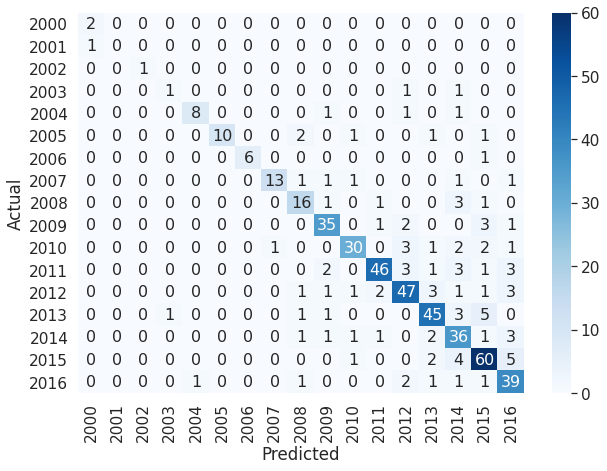

In [ ]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np


confusion = confusion_matrix(Y_test_numbers, y_pred_numbers)


df_cm = pd.DataFrame(confusion,
                     index = ['2000','2001','2002','2003','2004', '2005','2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'], 
                     columns = ['2000','2001','2002','2003','2004', '2005','2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'])




df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})